# The Plot Thickens

Or: how to make plots in Python.

### Imports
Let's start by importing our friends for data handling:
`numpy` and `pandas`

In [1]:
import numpy as np
import pandas as pd

Let's also import `matplotlib` and use the `%` operator to ask Jupyter notebooks to place our plots "inline" so that we can just see them in the notebook.

In [2]:
import matplotlib.pylab as plt
%matplotlib inline

Notice above that we have aliased matplotlib.pylab as `plt` meaning that when we want to create a plot, we're going to be using `plt` to do so!  Great!

# Basics

### Axes

Try running the code below. What does it do? What happens if you change the 4 numbers? 

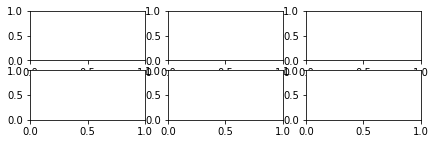

In [6]:
fig,ax = plt.subplots(2,3,figsize=(7,2))
# rows
# columns
# width
# height

### Lines

Let's learn how to plot points that are connected with a line. First, we'll contrive some data:

In [7]:
x = np.arange(0,20)
y = 0.1*x + np.random.rand(20)

Now, let's make some axes and plot the data in there. This is super easy! The command to plot is simply `plot`, and we just tell matplotlib which axes to plot into. In the example below, we call the axes `ax`, but you could change this if you wanted.

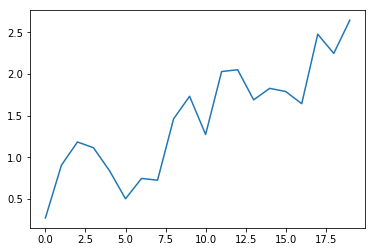

In [8]:
fig,ax = plt.subplots(1,1,figsize=(6,4))
ax.plot(x,y)

Cool! That's not too bad. As you can see, we just get a basic line plot. The default color is blue. Fine. 

Matplotlib has a few options for linestyles and for markers. Here is an example where we've asked for a dotted line and markers:

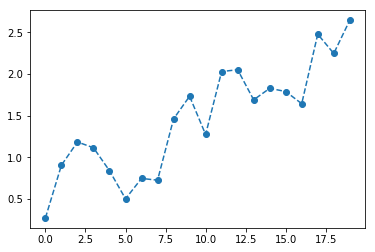

In [9]:
fig,ax = plt.subplots(1,1,figsize=(6,4))
ax.plot(x,y,linestyle='--',marker='o')

Holy smokes! Now we're talking. However, why stop at circular markers and a dotted line? You can change all kinds of things about the plots. 

**Problem 1** Figure out how to replot once more with [thin diamonds](https://matplotlib.org/api/markers_api.html#module-matplotlib.markers) and a [dotted line](https://matplotlib.org/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D.set_linestyle).  Bonus: make the line twice as thick.

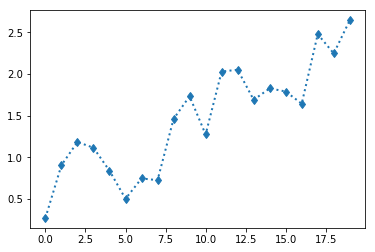

In [10]:
fig,ax = plt.subplots(1,1,figsize=(6,4))
ax.plot(x,y,linestyle=':',marker='d',linewidth=2)

### Scatter Plots

Scatter plots are just plots in which there are no connecting lines. To do this, we'll just call `ax.scatter`.  It's really simple! Check this out:

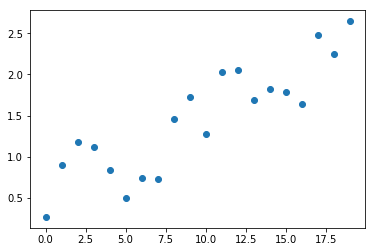

In [11]:
fig,ax = plt.subplots(1,1,figsize=(6,4))
ax.scatter(x,y)

We can also scatter multiple data sets on the same axes. Below, we'll create a new vector of data called y2 and scatter it onto the plot.

In [12]:
y2 = -(y**3)

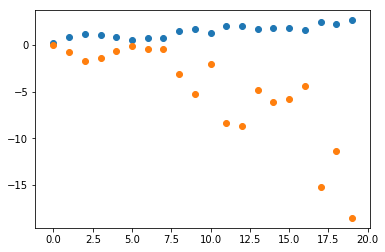

In [13]:
fig,ax = plt.subplots(1,1,figsize=(6,4))
ax.scatter(x,y)
ax.scatter(x,y2)

Figured out how the code above works? Ok, great! Then Google `matplotlib scatter` and read the documentation to determine how to...

**Problem 2**: change the size and symbol of the *second* scatter in order to make the two datasets more easily differentiable. 

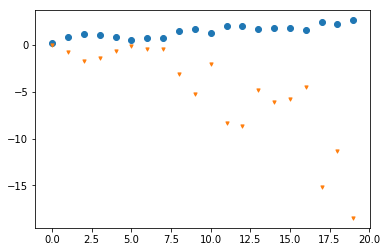

In [20]:
fig,ax = plt.subplots(1,1,figsize=(6,4))
ax.scatter(x,y)
ax.scatter(x,y2,s=10,marker='v')

### Histograms

Let's histogram something cool. How about the Titanic Data? Great. Let's load it in.

In [21]:
web_path='https://raw.githubusercontent.com/dblarremore/csci3022/master/notebooks/data/clean_titanic_data.csv'
df = pd.read_csv(web_path)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


It would be great if we could make a histogram easily from Pandas. Turns out, we can! Here's an example of a histogram of the Pclass variable.

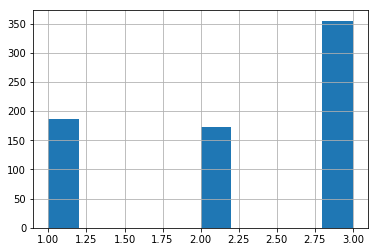

In [22]:
df['Pclass'].hist()

Uhhhh can you believe how easy that was?  If you can or if you cannot, please...

**Problem 3**: make a histogram of the `Age` variable. 

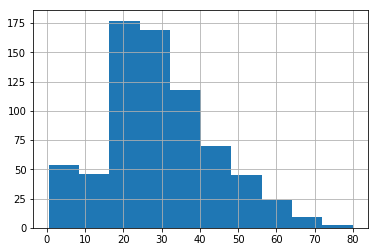

In [23]:
df['Age'].hist()

Great. But what if we're *not using* pandas? What if we just have data and we'd like to make a histogram of it? Fear not. Matplotlib is seriously great.

(array([2., 1., 3., 5., 9., 3., 5., 4., 5., 3.]),
 array([0.08780984, 0.20097061, 0.31413138, 0.42729216, 0.54045293,
        0.6536137 , 0.76677447, 0.87993524, 0.99309601, 1.10625679,
        1.21941756]),
 <a list of 10 Patch objects>)

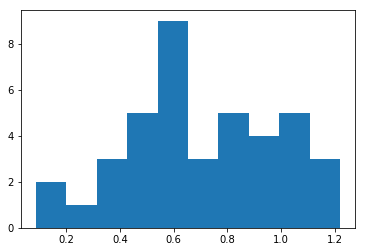

In [24]:
# Mini Problem 3.1
# Can you figure out what the next two lines are doing?
data = np.random.rand(40) # This gets 40 uniform random values between 0 and 1.
data[10:] += 0.3 # This adds 0.3 to everything from index 10 onward.

# Make a histogram the matplotlib way
fig,ax = plt.subplots(1,1,figsize=(6,4))
ax.hist(data)

Well, it looks ok. But the bars of the histogram are smushed together.  We'll want to gussy it up a little by changing the edge colors to white.

(array([2., 1., 3., 5., 9., 3., 5., 4., 5., 3.]),
 array([0.08780984, 0.20097061, 0.31413138, 0.42729216, 0.54045293,
        0.6536137 , 0.76677447, 0.87993524, 0.99309601, 1.10625679,
        1.21941756]),
 <a list of 10 Patch objects>)

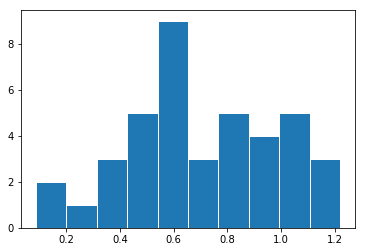

In [25]:
fig,ax = plt.subplots(1,1,figsize=(6,4))
ax.hist(data,edgecolor='white')

Compare this to what we'd get from pandas:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1038a5668>]],
      dtype=object)

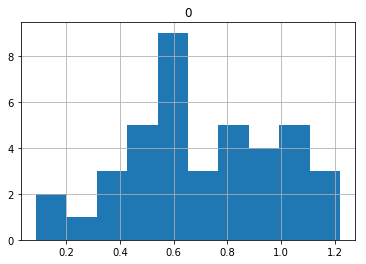

In [26]:
# This code calls the DataFrame constructor around our dataset 'data' 
# and then called hist() on that.
pd.DataFrame(data).hist()

### Box and Whiskers

NOTEBOOK ERROR!!! CELL NOT FOUND!

**Problem 4**: Well shoot. Looks like something was botched with the cell above. Can you (1) figure out how to make a box and whiskers plot of the Titanic `Age` dataset using `matplotlib` by finding the documentation for `matplotlib boxplot` online?

{'whiskers': [<matplotlib.lines.Line2D at 0x108db7f98>,
 'caps': [<matplotlib.lines.Line2D at 0x108e23ac8>,
 'boxes': [<matplotlib.lines.Line2D at 0x108e230b8>],
 'medians': [<matplotlib.lines.Line2D at 0x108e2c358>],
 'fliers': [<matplotlib.lines.Line2D at 0x108e2c780>],
 'means': []}

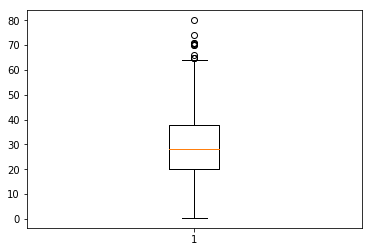

In [27]:
fig,ax = plt.subplots(1,1,figsize=(6,4))
ax.boxplot(df["Age"])

# Make it pretty

Sure. You can make plots that are ugly. But why would you? 

And sure, you can make plots that have no axis labels or legend, but then you'd get **zeroes** when you turned those in... so why would you?  Check out these beauty tips!

### Axis Labels

Very easy. 
- `ax.set_xlabel("string")`
- `ax.set_ylabel("string")`

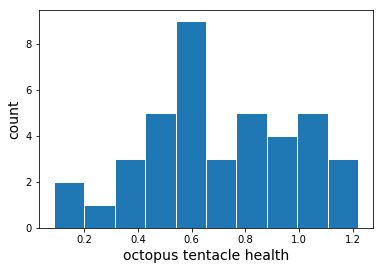

In [28]:
fig,ax = plt.subplots(1,1,figsize=(6,4))
ax.hist(data,edgecolor='white')
ax.set_xlabel("octopus tentacle health")
ax.set_ylabel("count")
# You can also change the font size!
# UNCOMMENT this code and try it!
ax.yaxis.label.set_size(14)
ax.xaxis.label.set_size(14)

### Legends

Again, matplotlib makes legends really easy. In fact, we get to *name* our data when we plot it by using the `label` option. Then, afterward, we simply ask matplotlib to turn on the legend.

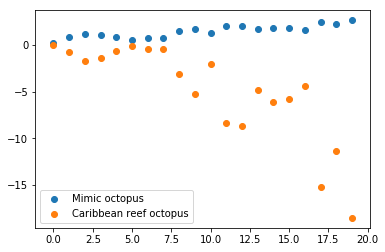

In [29]:
fig,ax = plt.subplots(1,1,figsize=(6,4))
ax.scatter(x,y,label="Mimic octopus")
ax.scatter(x,y2,label="Caribbean reef octopus")
ax.legend()

### Color
There are so many beautiful colors. Why use the defaults? First of all, you can plot in [lots of different colors](https://matplotlib.org/examples/color/named_colors.html)!  Here we go!

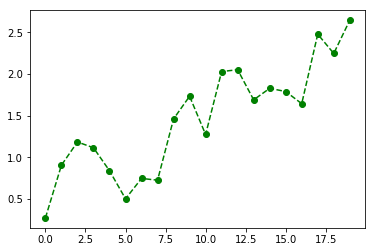

In [30]:
fig,ax = plt.subplots(1,1,figsize=(6,4))
ax.plot(x,y,
        linestyle='--',
        marker='o',
        color="green")

Oooooh that's looking great! Let's see some more, by using the power of subplots. 

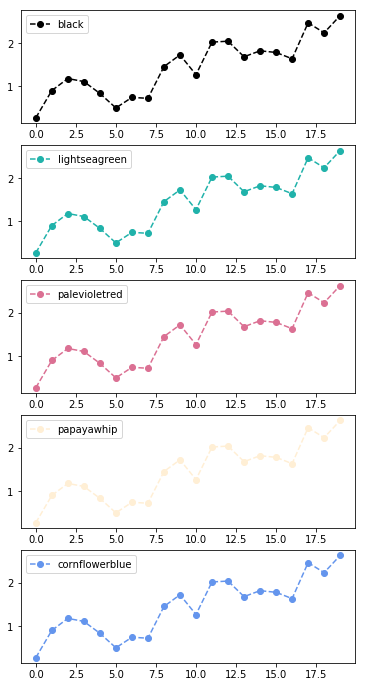

In [31]:
color_list = ["black","lightseagreen","palevioletred","papayawhip","cornflowerblue"]
fig,axs = plt.subplots(5,1,figsize=(6,12))
for idx,ax in enumerate(axs):
    ax.plot(x,y,
            linestyle='--',
            marker='o',
           color=color_list[idx],
           label=color_list[idx])
    ax.legend()

**Bonus Problem**: We used a function up above called `enumerate`.  Can you figure out what enumerate does?

While a for loop will iterate over the values in an array or list, `enumerate` is a function that allows us to iterate over the values themselves *and* the indices of those values. This is helpful if we want the values and their positions in one easy function call.

### Transparency

Finally, we can gussy things up by making them more or less transparent. This is done by setting the `alpha` value of the data. In the first plot, notice that it's hard to see what's going on, really. The points are all stacked up. But we can't see how densely they are stacked up.

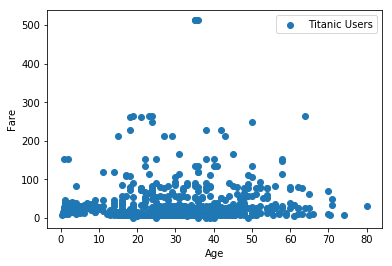

In [32]:
fig,ax = plt.subplots(1,1,figsize=(6,4))
ax.scatter(df["Age"],df["Fare"],label="Titanic Users")
ax.set_xlabel("Age")
ax.set_ylabel("Fare")
ax.legend()

`alpha` to the rescue!  When `alpha=0` the transparency is complete, with all the light getting through. When `alpha=1`, none of the light gets through and the colors are flat. This is the default. 

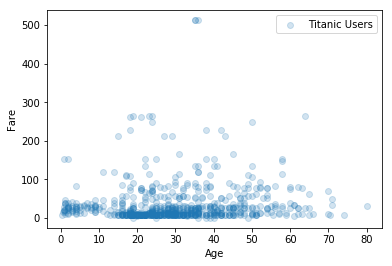

In [33]:
fig,ax = plt.subplots(1,1,figsize=(6,4))
ax.scatter(df["Age"],df["Fare"],label="Titanic Users",alpha=0.2)
ax.set_xlabel("Age")
ax.set_ylabel("Fare")
ax.legend()

# Saving

This is so easy. 

`plt.savefig('NAME.FILETYPE')`

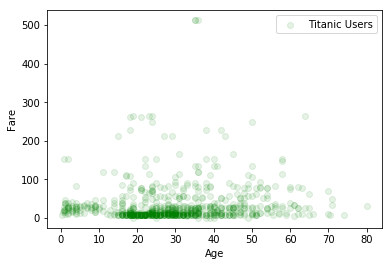

In [34]:
fig,ax = plt.subplots(1,1,figsize=(6,4))
ax.scatter(df["Age"],df["Fare"],label="Titanic Users",alpha=0.1,color="green")
ax.set_xlabel("Age")
ax.set_ylabel("Fare")
ax.legend()
plt.savefig('age_vs_fare.pdf') # save it as a pdf
plt.savefig('a_vs_f.png') # save it as a png
# Can you believe how easy this is??

# Pro Tip
ALERT: SUPERUSER PRO TIP!! Make your plot options real pretty by taking advantage of the fact that newlines aren't important to python:

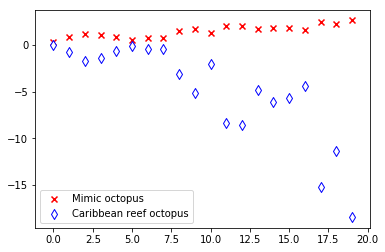

In [35]:
fig,ax = plt.subplots(1,1,figsize=(6,4))
ax.scatter(x,y,
           label="Mimic octopus",
           color="red",
           marker="x",)
ax.scatter(x,y2,
           label="Caribbean reef octopus",
           color="white",
           marker='d',
           edgecolors="blue",
           s=50,)
ax.legend()

# Final Exam

In [36]:
# make up some data
x = np.random.normal(5,size=40)
y1 = np.random.negative_binomial(np.arange(1,41),0.1)
y2 = 50*x + 10*np.random.rand(40)

**Problem 6**:  

Create a 4-panel plot (2x2) that consists of the following:

1. A scatter plot of both `y1` and `y2` vs `x`. Make `y1` green circles and make `y2` black x's. Make the green circles transparent and cartoonishly large.
2. Two side-by-side boxplots in a single plot, where the left boxplot is `y1` and the right boxplot is `y2`.
3. A histogram of the `x` values. Make it yellow with black outlines.
4. A plot of `y2` vs `x` in which the values are connected by a dot-dash line. Make it pink.

Be sure to label your axes with something funny, and include a legend on your scatter plot

Text(0,0.5,'octopuses')

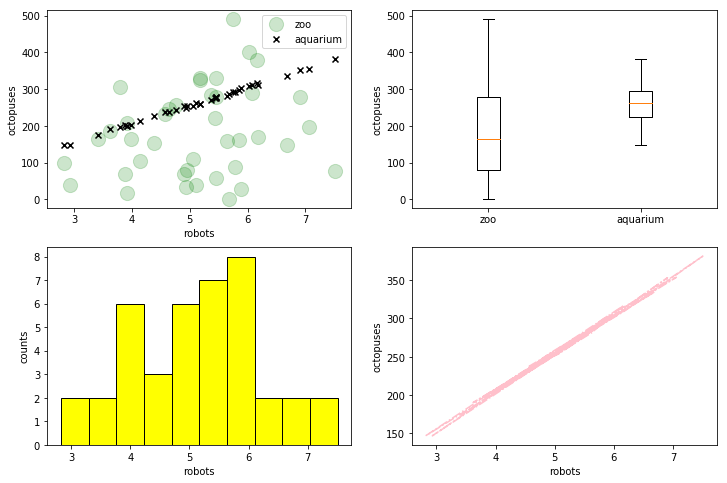

In [58]:
fig,axs = plt.subplots(2,2,figsize=(12,8))

# Scatter
axs[0,0].scatter(x,y1,
                 color="green",alpha=0.2,s=200,label="zoo")
axs[0,0].scatter(x,y2,
                 color="black",marker='x',label="aquarium")
axs[0,0].set_xlabel('robots')
axs[0,0].set_ylabel('octopuses')
axs[0,0].legend()

# Boxplots
axs[0,1].boxplot([y1,y2])
axs[0,1].set_ylabel('octopuses')
axs[0,1].set_xticklabels(["zoo","aquarium"])

# Histogram
axs[1,0].hist(x,facecolor="yellow",edgecolor="black")
axs[1,0].set_xlabel('robots')
axs[1,0].set_ylabel('counts')

# Plot
axs[1,1].plot(x,y2,
              linestyle='-.',color="pink")
axs[1,1].set_xlabel('robots')
axs[1,1].set_ylabel('octopuses')